In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

stud_df = pd.ExcelFile('datastud.xlsx')
table = stud_df.parse('Результаты')
table

,Дисциплина,Группа,Студент (Код),Семестр,ИД семестра,Зачет,Оценка по предмету,Пересдачи,Средний балл,Результат сессии,ЕГЭ,Оценка студента (опрос)
0,43,1,1,1,0,1.0,NaN,0,NaN,3,NaN,NaN
1,43,1,2,1,0,1.0,NaN,0,NaN,1,197.0,NaN
2,43,1,3,1,0,1.0,NaN,0,NaN,3,240.0,NaN
3,43,1,4,1,0,1.0,NaN,0,NaN,1,203.0,NaN
4,43,1,5,1,0,1.0,NaN,0,NaN,3,198.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16450,123,9,272,8,11,NaN,5.0,0,4.75,3,259.0,NaN
16451,123,9,274,8,11,NaN,4.0,0,4.00,1,152.0,NaN
16452,123,9,276,8,11,NaN,5.0,0,5.00,4,242.0,NaN
16453,123,9,277,8,11,NaN,5.0,0,5.00,4,260.0,NaN


In [2]:
pd.options.display.max_rows = 999
clean_table = table.drop(columns=['ИД семестра'])
session_table = clean_table.iloc[:, [1,3,8]]
session_table

,Группа,Семестр,Результат сессии
0,1,1,3
1,1,1,1
2,1,1,3
3,1,1,1
4,1,1,3
...,...,...,...
16450,9,8,3
16451,9,8,1
16452,9,8,4
16453,9,8,4


In [3]:
for x in range(1,9):
    semestr = session_table.loc[session_table['Семестр'] == x]
    mean_gr_sem = semestr.groupby(by=['Группа']).mean()
    semestr_stats = mean_gr_sem.reset_index().set_index('Семестр')
    if x == 1:
        empty_df = semestr_stats.iloc[0:0]
        global_df = pd.concat([semestr_stats, empty_df])
    else:
        global_df = pd.concat([semestr_stats, global_df])

In [4]:
global_df

,Группа,Результат сессии
Семестр,,
8.0,1,2.941176
8.0,2,2.411765
8.0,3,1.454545
8.0,4,1.800000
8.0,5,3.333333
8.0,6,1.186667
8.0,7,2.354839
8.0,8,2.500000
8.0,9,3.500000


In [5]:
copy_df= global_df.copy()
copy_df.reset_index(inplace=True)
heat_df = copy_df.pivot(index="Семестр", columns="Группа", values="Результат сессии")
heat_df

Группа,1,2,3,4,5,6,7,8,9
Семестр,,,,,,,,,
1.0,1.277778,2.365385,2.244444,-1.686131,-1.642680,-2.174224,0.075342,0.536424,2.047619
2.0,1.333333,0.536082,0.755556,-1.409375,1.148305,-0.465070,0.093333,-0.079096,0.907063
3.0,-1.173134,0.713936,1.661499,-0.898551,1.777174,-0.224932,0.125000,-0.314815,1.113122
4.0,0.061611,1.755882,2.193353,0.086486,0.083565,-2.231481,-0.681818,0.170799,1.784741
5.0,0.196429,1.254902,2.801688,1.305732,2.666667,-0.381395,2.040268,1.277778,3.074074
6.0,0.038136,0.523810,0.750000,-1.396552,1.676580,-0.569444,1.929487,-0.027650,2.075472
7.0,2.411765,2.611111,2.695652,1.600000,3.375000,2.081081,1.428571,2.055556,3.269231
8.0,2.941176,2.411765,1.454545,1.800000,3.333333,1.186667,2.354839,2.500000,3.500000


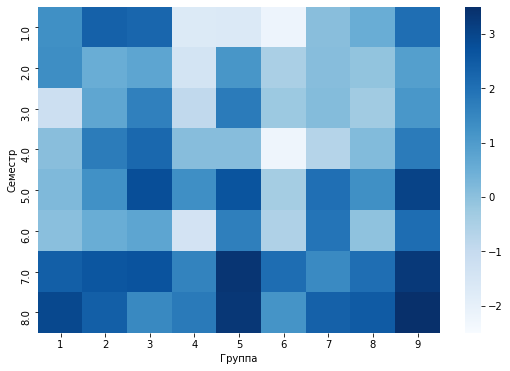

In [6]:
plt.figure(figsize=(9,6))
sns.heatmap(heat_df, vmin=-2.5, vmax=3.5, cmap='Blues');

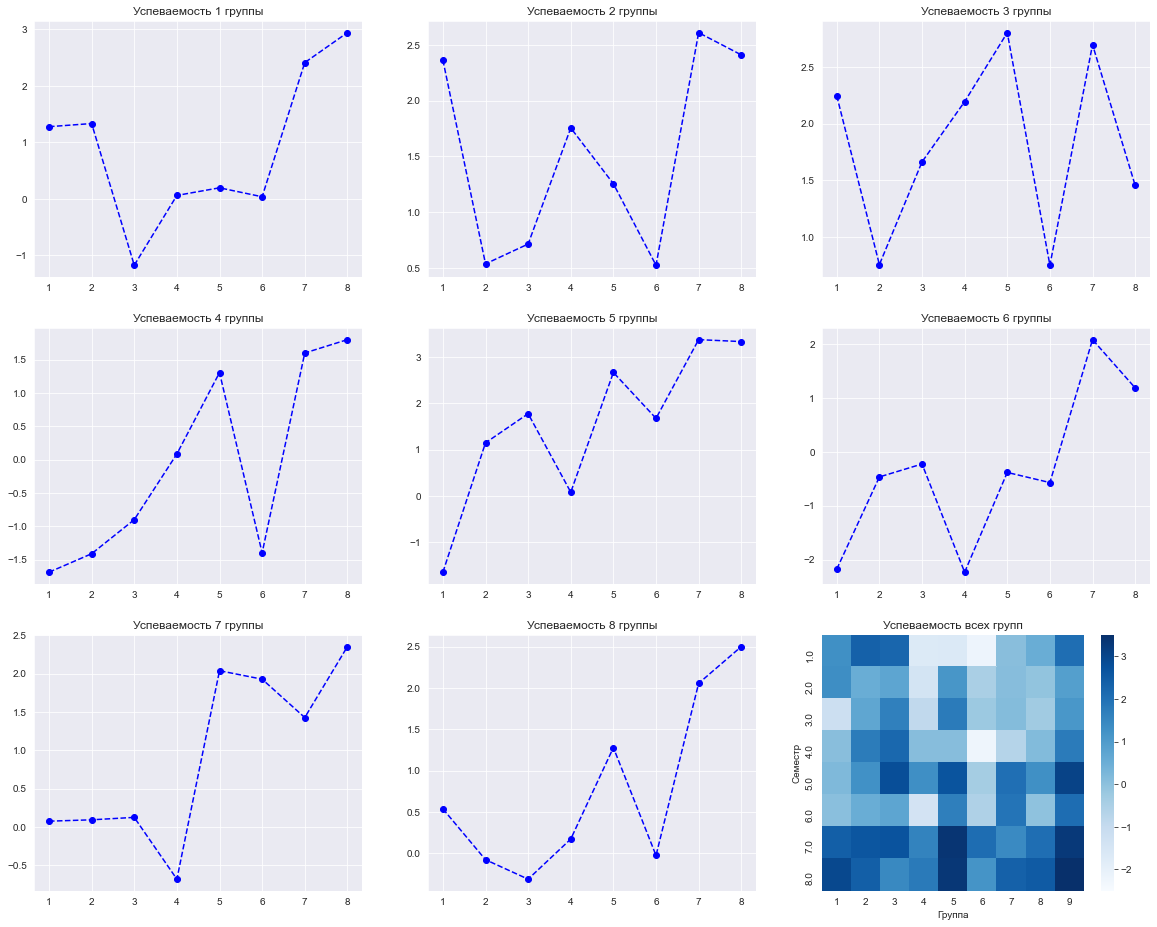

In [7]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(3, 3, figsize = (20,16));
axs[0,0].plot(heat_df.iloc[:,[0]], 'o--b')
axs[0,0].set_title('Успеваемость 1 группы')
axs[0,1].plot(heat_df.iloc[:,[1]], 'o--b')
axs[0,1].set_title('Успеваемость 2 группы')
axs[0,2].plot(heat_df.iloc[:,[2]], 'o--b')
axs[0,2].set_title('Успеваемость 3 группы')
axs[1,0].plot(heat_df.iloc[:,[3]], 'o--b')
axs[1,0].set_title('Успеваемость 4 группы')
axs[1,1].plot(heat_df.iloc[:,[4]], 'o--b')
axs[1,1].set_title('Успеваемость 5 группы')
axs[1,2].plot(heat_df.iloc[:,[5]], 'o--b')
axs[1,2].set_title('Успеваемость 6 группы')
axs[2,0].plot(heat_df.iloc[:,[6]], 'o--b')
axs[2,0].set_title('Успеваемость 7 группы')
axs[2,1].plot(heat_df.iloc[:,[7]], 'o--b')
axs[2,1].set_title('Успеваемость 8 группы');
sns.heatmap(heat_df, vmin=-2.5, vmax=3.5, cmap='Blues', ax=axs[2,2]);
axs[2,2].set_title('Успеваемость всех групп');

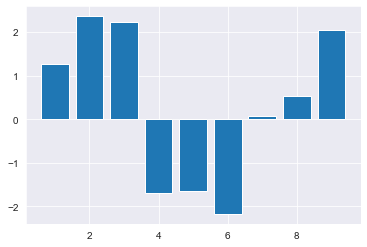

In [14]:
plt.bar(heat_df.iloc[0].index, heat_df.iloc[0]);

Text(0.5, 1.0, 'Успеваемость в 8-ом семестре')

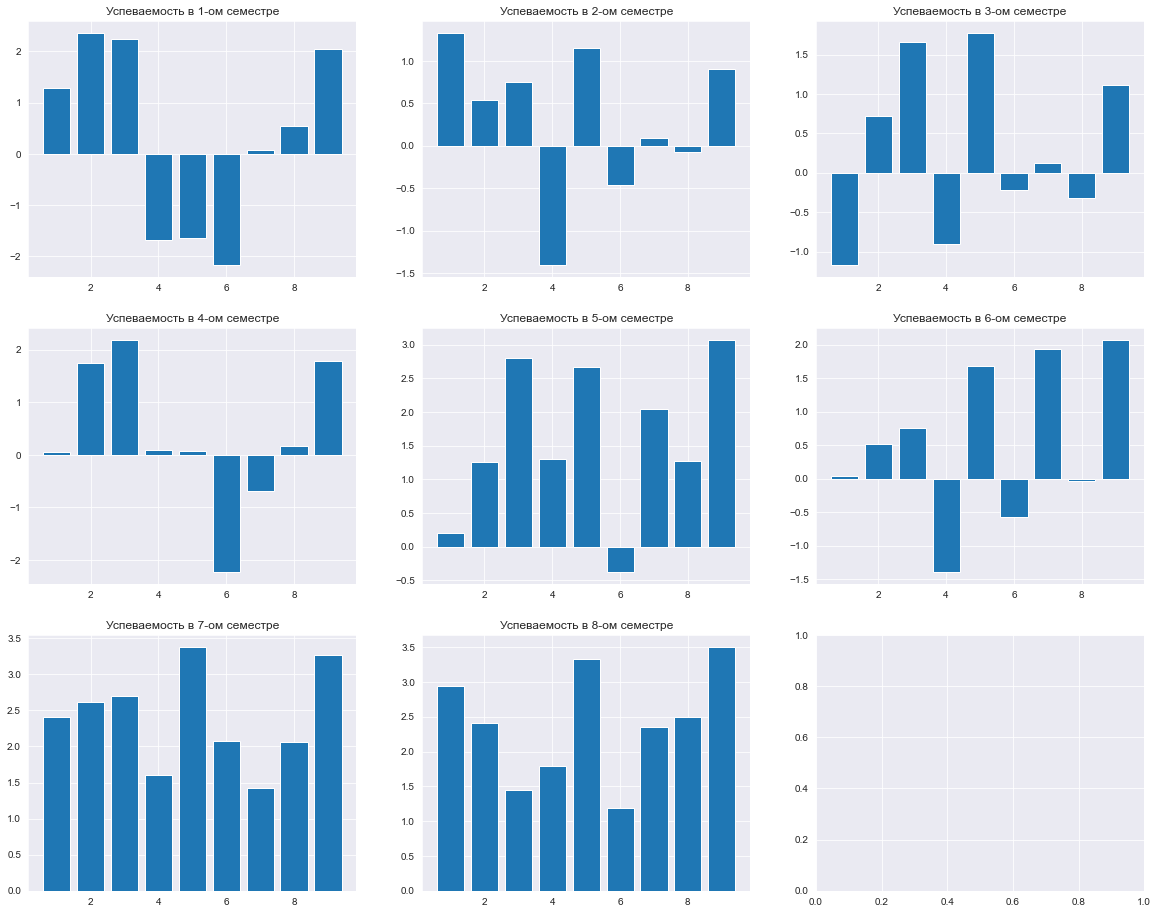

In [16]:
fig, axs = plt.subplots(3, 3, figsize = (20,16));
axs[0,0].bar(heat_df.iloc[0].index, heat_df.iloc[0])
axs[0,0].set_title('Успеваемость в 1-ом семестре')
axs[0,1].bar(heat_df.iloc[1].index, heat_df.iloc[1])
axs[0,1].set_title('Успеваемость в 2-ом семестре')
axs[0,2].bar(heat_df.iloc[2].index, heat_df.iloc[2])
axs[0,2].set_title('Успеваемость в 3-ом семестре')
axs[1,0].bar(heat_df.iloc[3].index, heat_df.iloc[3])
axs[1,0].set_title('Успеваемость в 4-ом семестре')
axs[1,1].bar(heat_df.iloc[4].index, heat_df.iloc[4])
axs[1,1].set_title('Успеваемость в 5-ом семестре')
axs[1,2].bar(heat_df.iloc[5].index, heat_df.iloc[5])
axs[1,2].set_title('Успеваемость в 6-ом семестре')
axs[2,0].bar(heat_df.iloc[6].index, heat_df.iloc[6])
axs[2,0].set_title('Успеваемость в 7-ом семестре')
axs[2,1].bar(heat_df.iloc[7].index, heat_df.iloc[7])
axs[2,1].set_title('Успеваемость в 8-ом семестре')